# PSILOCYBIN MICE

THEY DIDN'T PUBLISH THE METADATA SO WE HAVE TO FLY BY THE SEAT OF OUR PANTS BUT IT SHOULD BE OK, THOSE ARE MOUSE BRAIN CELL TYPES AFTER ALL

In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import scanpy as sc
import anndata as ad

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from platython import normalise as pn
from anticor_features.anticor_features import get_anti_cor_genes
import topo as tp
from topo.tpgraph.intrinsic_dim import IntrinsicDim

In [3]:
_psilo = sc.read_10x_mtx("/Users/npapadop/Documents/teaching/2024/GSE246451/psilo/")
_psilo.obs.index = _psilo.obs.index.str.replace("-1", "-p")
_psilo.obs["condition"] = "psilocybin"
_saline = sc.read_10x_mtx("/Users/npapadop/Documents/teaching/2024/GSE246451/saline/")
_saline.obs.index = _saline.obs.index.str.replace("-1", "-s")
_saline.obs["condition"] = "saline"

In [4]:
for adata in [_saline, _psilo]:
    sc.pp.filter_cells(adata, min_genes=700)
    sc.pp.filter_genes(adata, min_cells=10)
    adata.var["mt"] = adata.var_names.str.startswith("mt-")
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)

Calculate naive z-scores on each dataset separately:

In [5]:
for adata in [_saline, _psilo]:
    # (x - m) / sigma
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_total(adata)
    avg = np.mean(adata.X.toarray(), axis=0)
    std = np.std(adata.X.toarray(), axis=0)
    adata.layers["z"] = (adata.X - avg) / std

In [6]:
adata = ad.concat((_psilo, _saline))
del _psilo, _saline

In [7]:
adata

AnnData object with n_obs × n_vars = 25018 × 20793
    obs: 'condition', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    layers: 'counts', 'z'

In [8]:
sc.pp.log1p(adata)
adata.layers["log1p"] = adata.X.copy()

In [9]:
sc.pp.highly_variable_genes(adata, batch_key="condition")

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:498: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  hvg = pd.concat([hvg, missing_hvg], ignore_index=True)
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing

In [10]:
adata.X = adata.layers["z"].copy()

In [11]:
sc.tl.pca(adata, use_highly_variable=True)

In [12]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


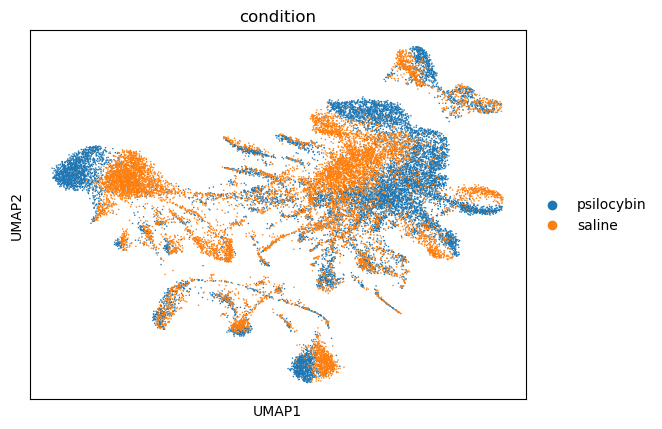

In [14]:
sc.pl.umap(adata, color="condition")

In [17]:
adata.X = adata.layers["log1p"].copy()

In [18]:
sc.pp.combat(adata, key="condition")

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:199: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_info = model.groupby(key).indices.values()
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_combat.py:95: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_items = model.groupby(batch_key).groups.items()


/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


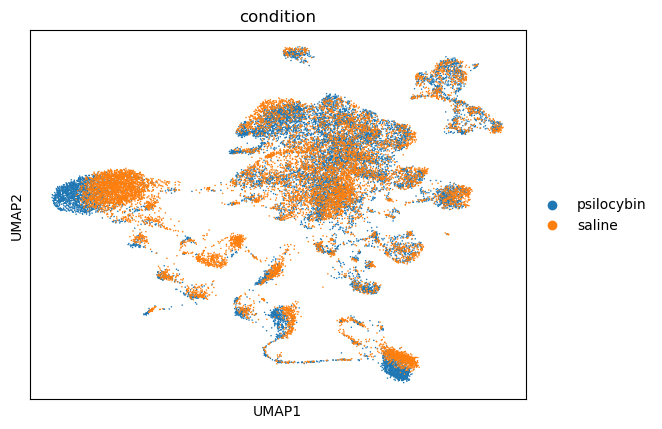

In [19]:
sc.pp.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="condition")

# scanorama integration

## muddy points

- have basic workflow planned out/sent out, go on tangents from there
- maybe build up cheat sheet for tasks? (me or students?)
- definitely send finished notebooks each day

In [ ]:
marker_genes = ["Ptgds", "Rgs5", "Pecam1", "Opalin", "Mog", "Pdgfra",
                "Cx3cr1", "Acsbg1", "Vip", "Sst", "Pvalb", "Lamp5",
                "Gad2", "Dlx6os1", "Foxp2", "Rorb", "Il1rapl1",
                "Arhgap15", "Pld5", "Slc17a7", "Snap25"]

## Normalisation

In [ ]:
pn.PFlogPF(adata)

## Informative gene selection

In [ ]:
anti_cor_table = get_anti_cor_genes(adata.X.T,
                                    adata.var.index.tolist(),
                                    species="mmusculus")

selected_table = anti_cor_table[anti_cor_table["selected"]==True]
print(selected_table)

In [ ]:
adata.var = pd.concat([adata.var, anti_cor_table], axis=1)

## Dimensionality estimation

In [ ]:
hvg = adata[:, adata.var["selected"] == True].copy()

In [ ]:
hvg

In [ ]:
id_est = IntrinsicDim(
    methods=['fsa', 'mle'], # the methods we'll use
    k=range(10, 120, 10), # the number of k-neighbors to test
    backend='hnswlib',  # the approximate kNN backend to use
    metric='cosine', # the distance metric to use
    n_jobs=-1, # the number of jobs to run in parallel
    plot=True, # whether to plot the results during fit()
    random_state=None) # the random state to use for colors

# Estimate the i.d.
id_est.fit(hvg.X)

In [ ]:
from scipy.stats import spearmanr

# Compare the results for 100 k-nearest-neighbors
fsa_local = id_est.local_id['fsa']['100']
mle_local = id_est.local_id['mle']['100']

corr, _ = spearmanr(fsa_local, mle_local)

plt.scatter(fsa_local, mle_local)
plt.show()

print('Spearman R correlation: %.3f' % corr)

In [ ]:
# Compute correlation between the i.d. estimates for each kNN value
keys = []
corr = []
for i_id, k_fsa in enumerate(id_est.local_id['fsa']):
    keys.append(k_fsa)
    for i_id, k_mle in enumerate(id_est.local_id['mle']):
        corr.append(spearmanr(id_est.local_id['fsa'][k_fsa], id_est.local_id['mle'][k_mle])[0])

# Create square array of correlations from the list
cor_array = np.array(corr).reshape((11, 11))
cor_array

# Plot as a heatmap
fig, ax = plt.subplots(figsize=(8,8))

im, cbar = tp.pl.heatmap(cor_array, keys, keys, ax=ax,
                   cmap="plasma", cbarlabel="Pearson product-moment correlation", cbar_fontsize=18, shrink=0.8, cb_pad=0.05)

# Annotated heatmap
texts = tp.pl.annotate_heatmap(im, valfmt="{x:.1f}", textcolors=("white", "black"), an_fontsize=14)

ax.set_xlabel('FSA - number of kNN', fontsize=16)
ax.set_ylabel('MLE - number of kNN', fontsize=16)
ax.set_title('ayahuasca mice - i.d. estimates', fontsize=32)
fig.tight_layout()
plt.show()

In [ ]:
# Create TopOGraph object using 20 kNN
tg = tp.TopOGraph(base_knn=30, 
                    n_eigs=150, # set this to the largest estimate!
                    n_jobs=-1,
                    verbosity=0)

# Run a TopOMetry model
hvg = tp.sc.topological_workflow(
    hvg,                  # the anndata object
    tg,                # the TopOGraph object
    kernels=['bw_adaptive'],# the kernel(s) to use
    eigenmap_methods=['DM'],# the eigenmap method(s) to use
    projections=['MAP'],    # the projection(s) to use
    resolution=2.0          # the Leiden clustering resolution
)

In [ ]:
tg.eigenspectrum()

In [ ]:
adata.uns["proposed_dimensionality"] = 80

In [ ]:
from sklearn.decomposition import PCA
from umap import UMAP

sc.pp.scale(hvg, max_value=10)

pca_op = PCA(n_components=adata.uns["proposed_dimensionality"]) # compute similar amount of components for fair comparison
pca_Y = pca_op.fit_transform(hvg.X)

umap_PCA = UMAP(n_components=2, metric='cosine').fit_transform(pca_Y)

In [ ]:
evaluation_dict = tp.pipes.eval_models_layouts(tg, hvg.X,
                                                    kernels=['bw_adaptive'],
                                                    eigenmap_methods=['msDM','DM','LE'],
                                                    projections=['MAP'],
                                                    additional_eigenbases={"PCA_scale": pca_Y},
                                                    additional_projections={'UMAP': umap_PCA},
                                                    n_neighbors=3,
                                                    n_pcs=adata.uns["proposed_dimensionality"],
                                                    n_jobs=-1
                                                )

In [ ]:
pd.DataFrame(evaluation_dict)

In [ ]:
# save best embeddings
adata.obsm["X_PCA"] = pca_Y
adata.obsm["X_DM"] = tg.EigenbasisDict['DM with bw_adaptive'].results()

# save two best projections
adata.obsm["X_topo"] = tg.ProjectionDict['MAP of bw_adaptive from LE with bw_adaptive']
adata.obsm["X_umap"] = umap_PCA

# keep track of our choices
adata.uns["X_topo"] = 'MAP of bw_adaptive from LE with bw_adaptive'
adata.uns["topo_eval_dict"] = evaluation_dict

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sc.pl.embedding(adata, basis="X_topo", ax=ax, color="condition")

## Cluster analysis

In [ ]:
from platython import cluster as pc

In [ ]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_DM", metric="cosine", n_pcs=80)

In [ ]:
sc.tl.leiden(adata, resolution=1.)
pc.merge_clusters(adata, "leiden", num_genes=40)

In [ ]:
sc.pl.embedding(adata, basis="X_topo", color=["leiden", "leiden_merged"], legend_loc="on data")

In [ ]:
sc.tl.dendrogram(adata, groupby="leiden_merged", use_rep="X_DM")

In [ ]:
sc.pl.dotplot(adata, groupby="leiden_merged", var_names=marker_genes, swap_axes=True, cmap="plasma_r", dendrogram=True)

In [ ]:
sc.tl.paga(adata, "leiden_merged")